# Handwriting Recognition

#### Handwriting recognition is a well-studied subject in computer vision and has found wide applications in our daily life (such as USPS mail sorting). In this project, we will explore various machine learning techniques for recognizing handwriting digits. The dataset you will be using is the well-known MINST dataset.

#### (1) The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. 
(http://yann.lecun.com/exdb/mnist/)

#### The goal of this project is to build a 10-class classifier to recognize those handwriting digits as accurately as you can.  All the assignments below should use the training data (60K examples) and test data (10 K examples) as given by the dataset.

In [101]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

img_train = 'samples/train-images-idx3-ubyte'
img_test = 'samples/t10k-images-idx3-ubyte'
lbl_train = 'samples/train-labels-idx1-ubyte'
lbl_test = 'samples/t10k-labels-idx1-ubyte'

x_train = idx2numpy.convert_from_file(img_train)
y_train = idx2numpy.convert_from_file(lbl_train)
x_test = idx2numpy.convert_from_file(img_test)
y_test = idx2numpy.convert_from_file(lbl_test)

In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

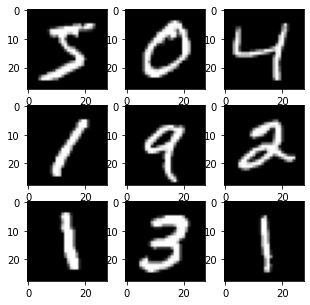

In [103]:
## sample of images in the training set
plt.gray() 
plt.figure(figsize = (5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [104]:
print(x_train.min())
print(x_train.max())

0
255


In [105]:
# Normalization
x_train = x_train.astype(float) /255.0
x_test = x_test.astype(float)/255.0

In [106]:
#Check Normalization
print(x_train.min())
print(x_train.max())

0.0
1.0


In [107]:
# Reshaping input data (in order to be able to pass into k-means)
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [108]:
# New dimensions
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Assignment #1

Do a clustering of the training dataset with the cluster number K=10 first (without looking at the labels), and then assign a class label to each cluster based on majority vote of the cluster member’s known digital labels.  
Based on that, compute the training classification accuracy for 10 classes from clustering. Then use each cluster’s centroid as the anchor point, and you will obtain 10 class centroids corresponding 10 anchor points. 
To compute testing accuracy, first assign each test image to the nearest centroid with the corresponding centroid label, and then compute the test accuracy. 

In [109]:
from sklearn.cluster import KMeans

In [111]:
kmeans = KMeans(10)
kmeans.fit(X_train)
centroids = kmeans.cluster_centers_

In [112]:
# denote clusters to which images belongs to
cluster_labels = kmeans.labels_

In [113]:
##assicoates clusters with labels
def map_labels(cluster_labels, actual_labels):
    # initialize dictionary that maps clusters to digits
    map_labels = {}
    for i in range(10):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(actual_labels[index==1]).argmax()
        map_labels[i] = num
    return map_labels

In [114]:
map_labels = map_labels(cluster_labels, y_train)

In [115]:
map_labels

{0: 0, 1: 8, 2: 1, 3: 1, 4: 0, 5: 4, 6: 7, 7: 3, 8: 6, 9: 2}

In [116]:
##assign inferred digits to clusters
def assign_digits(cluster_labels, map_labels):
    digits = []
    for cluster in cluster_labels:
        digit = map_labels[cluster]
        digits.append(digit)
    return digits

In [117]:
inferred_digits = assign_digits(cluster_labels, map_labels)
inferred_digits[:25]

[8, 0, 4, 1, 7, 2, 1, 8, 1, 7, 3, 1, 3, 6, 1, 7, 2, 8, 6, 7, 4, 0, 7, 1, 1]

In [118]:
from sklearn.metrics import accuracy_score
print("Accuracy for the training set:", accuracy_score(inferred_digits,y_train))

Accuracy for the training set: 0.5907


In [119]:
def get_centroid_labels(centroids, map_labels):
    labeled_centroids = {}
    for i in range(10):
        labeled_centroids[map_labels[i]] = centroids[i]
    return labeled_centroids      

In [120]:
## convert centroids into 3d arrays in order to display them as images
centroid_images = centroids.reshape(len(centroids),28,28)

In [121]:
labeled_centroids = get_centroid_labels(centroid_images, map_labels)

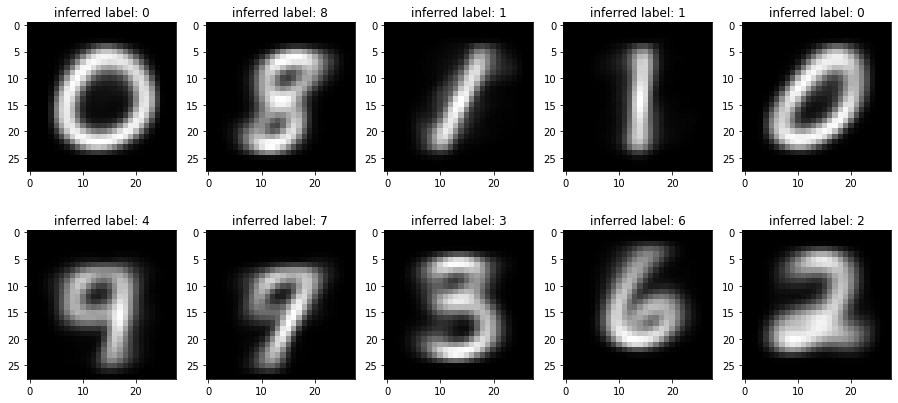

In [122]:
## display centroids with their inferred labels
plt.figure(figsize = (20,7))
bottom = 0.3
for i in range(10):
 plt.subplots_adjust(bottom)
 plt.subplot(2,5,i+1)
 plt.title('inferred label: ' + str(map_labels[i]))
 plt.imshow(centroid_images[i])

In [127]:
lbl_centroids = labeled_centroids.keys()
lbl_centroids

dict_keys([0, 8, 1, 4, 7, 3, 6, 2])

In [128]:
##eucledian distance for 2 vectors
def eucl_dist(u, v):
    dist = 0
    for i in range(len(u)):
        dist = dist + ((u[i] - v[i])**2)
    return dist ** 0.5

In [129]:
##predict labels for test sets based on their proximity to centroids
def predict_labels(labeled_centroids, X_test, predict_labels):
    for img in X_test:
        min_dist = float('inf')
        assigned_digit = 0
        for key in labeled_centroids:
            dist = eucl_dist(img, labeled_centroids[key])
            if dist < min_dist:
                min_dist = dist
                assigned_digit = key
        predict_labels.append(assigned_digit)
    return predict_labels

In [130]:
labeled_centroid_arrays = get_centroid_labels(centroids, map_labels)

In [131]:
predicted_labels = predict_labels(labeled_centroid_arrays, X_test, [])

In [132]:
predicted_labels[:25]

[7, 3, 1, 0, 4, 1, 4, 4, 4, 7, 3, 6, 7, 0, 1, 3, 4, 7, 3, 4, 7, 6, 4, 8, 4]

In [133]:
print("Accuracy of test predicted labels:", accuracy_score(predicted_labels,y_test))

Accuracy of test predicted labels: 0.5752


# Assignment #2

Build a number of non DNN based classifiers using all pixels as features for handwriting recognition. You need to use at least two the following four techniques we have learned from the class to do the work: 

•	Logistic regression
•	SVM
•	Decision tree, and 
•	Random forest

For each technique, please use your own language to give a general description of the technique, its pros and cons, and why such a technique is suitable for solving the handwriting recognition problem. The goal is to make sure you know why you decide to choose this technique.
Please also make a comparison table among the four techniques as well as the method from Assignment #1 above.

### Logistic Regression

The Logistic Regression is classification algorithm used when the output is categorical. The ideology behind the classification is finding the relationship between the features and probabilities. The results can be interpreted as likelihood that the data in the question belongs to a particular class.

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
logistic = LogisticRegression(max_iter = 2000)

In [148]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [149]:
## predict labels using logistic regression
predict_labels_logistic = logistic.predict(X_test)

In [150]:
print("Accuracy of test predicted labels for logistic regression:", accuracy_score(predict_labels_logistic,y_test))

Accuracy of test predicted labels for logistic regression: 0.9256


### Random Forest

A random forest consist of combination of uncorrelated decision trees and each works on various sub samples of the dataset. As each tree have different error instances averaging them all can provide better predictive accuracy and control over-ﬁtting.

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
random_forest = RandomForestClassifier(n_jobs=-1, n_estimators=10)

In [153]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [154]:
predict_labels_forest = random_forest.predict(X_test)

In [155]:
print("Accuracy of test predicted labels for random forest:", accuracy_score(predict_labels_forest,y_test))

Accuracy of test predicted labels for random forest: 0.9483


# Assignment #3

In this assignment, we will explore various techniques related to neural network and deep learning to solve the 10-class classification problem.
Since there are many existing implementations to solve the MINST problem, we need to give some twists to this problem to make it worthwhile to do for our final project. (Please refer to the ranking list for MNIST at http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html.)
The basic network structure that we are trying to explore is something like the following (i.e., the fully connected deep neural nets). The number of hidden layers and the size of each hidden layer in terms of neurons are left as tuning parameters that you can explore.


In [135]:
def empty_vector():
    return [0,0,0,0,0,0,0,0,0,0] 

def one_hot_encoding(digits):
    output = []
    for digit in digits:
        vector = empty_vector()
        vector[digit] = 1
        output.append(vector)
    return output

In [136]:
Y_test = one_hot_encoding(y_test)
Y_train = one_hot_encoding(y_train)

In [137]:
import argparse
import tensorflow_datasets 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#from tensorflow.examples.tutorials.mnist import input_data

#def build_arg_parser():
#    parser = argparse.ArgumentParser(description='Build a CNN classifier \
#            using MNIST data')
#    parser.add_argument('--input-dir', dest='input_dir', type=str,
#            default='./mnist_data', help='Directory for storing data')
#    return parser

def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
            strides=[1, 2, 2, 1], padding='SAME')

if __name__ == '__main__':
    #args = build_arg_parser().parse_args()
    
    # Get the MNIST data
    mnist = tensorflow_datasets.load('mnist')
    #mnist = input_data.read_data_sets(args.input_dir, one_hot=True)
    # The images are 28x28, so create the input layer
    # with 784 neurons (28x28=784)
    x = tf.placeholder(tf.float32, [None, 784])

    # Reshape 'x' into a 4D tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Define the first convolutional layer
    W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

    # Convolve the image with weight tensor, add the
    # bias, and then apply the ReLU function
    h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

    # Apply the max pooling operator
    h_pool1 = max_pooling(h_conv1)

    # Define the second convolutional layer
    W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

    # Convolve the output of previous layer with the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

    # Apply the max pooling operator
    h_pool2 = max_pooling(h_conv2)

    # Define the fully connected layer
    W_fc1, b_fc1 = create_layer([7 * 7 * 64, 1024])

    # Reshape the output of the previous layer
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # Define the readout layer (output layer)
    W_fc2, b_fc2 = create_layer([1024, 10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    # Define the entropy loss and the optimizer
    y_loss = tf.placeholder(tf.float32, [None, 10])
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_loss, logits=y_conv))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Define the accuracy computation
    predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)

    # Start training
    num_iterations = 21000
    batch_size = 75
    train_size = len(X_train)
    total_batches = int(train_size/batch_size)
    print('\nTraining the model....')
    for i in range(num_iterations):
        # Get the next batch of images
        #batch = mnist.train.next_batch(batch_size)
        offset = (i * batch_size) % (train_size)
        batch_xs = X_train[offset:(offset + batch_size)]
        batch_ys = Y_train[offset:(offset + batch_size)]
        # Print progress
        if i % 50 == 0:
            cur_accuracy = accuracy.eval(feed_dict = {
                    x: batch_xs, y_loss: batch_ys, keep_prob: 1.0})
            print('Iteration', i, ', Accuracy =', cur_accuracy)

        # Train on the current batch
        optimizer.run(feed_dict = {x: batch_xs, y_loss: batch_ys, keep_prob: 0.5})

    # Compute accuracy using test data
    print('Test accuracy =', accuracy.eval(feed_dict = {
            x: X_test, y_loss: Y_test,
            keep_prob: 1.0}))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '



Training the model....
Iteration 0 , Accuracy = 0.14666666
Iteration 50 , Accuracy = 0.74666667
Iteration 100 , Accuracy = 0.85333335
Iteration 150 , Accuracy = 0.8933333
Iteration 200 , Accuracy = 0.88
Iteration 250 , Accuracy = 0.9066667
Iteration 300 , Accuracy = 0.84
Iteration 350 , Accuracy = 0.94666666
Iteration 400 , Accuracy = 0.93333334
Iteration 450 , Accuracy = 0.94666666
Iteration 500 , Accuracy = 0.8666667
Iteration 550 , Accuracy = 0.9066667
Iteration 600 , Accuracy = 0.93333334
Iteration 650 , Accuracy = 0.97333336
Iteration 700 , Accuracy = 1.0
Iteration 750 , Accuracy = 0.94666666
Iteration 800 , Accuracy = 0.96
Iteration 850 , Accuracy = 0.97333336
Iteration 900 , Accuracy = 0.96
Iteration 950 , Accuracy = 1.0
Iteration 1000 , Accuracy = 0.9866667
Iteration 1050 , Accuracy = 0.9866667
Iteration 1100 , Accuracy = 0.92
Iteration 1150 , Accuracy = 0.97333336
Iteration 1200 , Accuracy = 0.96
Iteration 1250 , Accuracy = 0.97333336
Iteration 1300 , Accuracy = 0.92
Iteratio

Iteration 11950 , Accuracy = 1.0
Iteration 12000 , Accuracy = 1.0
Iteration 12050 , Accuracy = 1.0
Iteration 12100 , Accuracy = 1.0
Iteration 12150 , Accuracy = 1.0
Iteration 12200 , Accuracy = 1.0
Iteration 12250 , Accuracy = 1.0
Iteration 12300 , Accuracy = 1.0
Iteration 12350 , Accuracy = 1.0
Iteration 12400 , Accuracy = 0.9866667
Iteration 12450 , Accuracy = 1.0
Iteration 12500 , Accuracy = 1.0
Iteration 12550 , Accuracy = 1.0
Iteration 12600 , Accuracy = 1.0
Iteration 12650 , Accuracy = 1.0
Iteration 12700 , Accuracy = 1.0
Iteration 12750 , Accuracy = 1.0
Iteration 12800 , Accuracy = 1.0
Iteration 12850 , Accuracy = 1.0
Iteration 12900 , Accuracy = 1.0
Iteration 12950 , Accuracy = 1.0
Iteration 13000 , Accuracy = 1.0
Iteration 13050 , Accuracy = 1.0
Iteration 13100 , Accuracy = 1.0
Iteration 13150 , Accuracy = 1.0
Iteration 13200 , Accuracy = 1.0
Iteration 13250 , Accuracy = 1.0
Iteration 13300 , Accuracy = 1.0
Iteration 13350 , Accuracy = 1.0
Iteration 13400 , Accuracy = 1.0
Iter

# Assignment #4

This assignment reflects the data collection process. Everyone is required to 
•	Hand write 5 styles of your own digits from 0 to 9 on a paper, and make sure your own handwritings are for sure recognizable by yourself. Please take a picture of each digit you write (so you have total 5 x 10 = 50 images), resize and convert it to the same data input format as the MNIST dataset. In other words, you have 50 new data points with labels.
•	Treat these 50 images as “brand-new” test dataset and run your own ML models from Assignment #1 - #4 on these 50 images and report the achieved test accuracy. Note, the goal for this exercise is not for achieving “high” accuracy, but to show what potential gaps there may be between existing MNIST dataset and your own test dataset, a scenario you would encounter in real life.

In your report (not formal) and submission, the following is required for this assignment 
•	Show all 50 images you create with the corresponding labels you intend to assign, 
•	Make a table to show the test accuracy on these 50 images for each ML model you obtained from Assignment #1 to #4
•	Submit in a subfolder with your 50 handwriting dataset in MNIST format. 

In [138]:
import os
from PIL import Image
import cv2 

In [139]:
def test_set(path):
    files = np.sort(os.listdir(path))
    test_images = []
    for file in files:
        img = np.asarray(Image.open(path + '/' + file))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (28,28), interpolation = cv2.INTER_AREA)
        for i in range(len(img_resized)):
            for j in range(len(img_resized[0])):
                ##make white digits on the black background
                img_resized[i][j] = img_resized[i][j] - 255
                if img_resized[i][j] != 0:
                    img_resized[i][j] = 255
        test_images.append(img_resized)
    return np.asarray(test_images)

In [140]:
test_images = test_set('./test')

<Figure size 432x288 with 0 Axes>

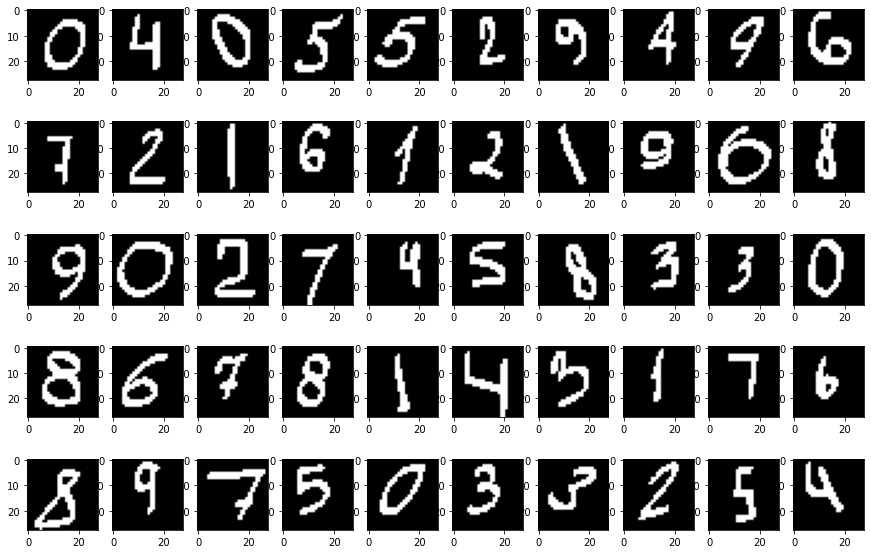

In [141]:
## display the handwritten images
plt.gray() 
plt.figure(figsize = (15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_images[i])

In [142]:
## real labels for the dataset
test_labels = [0, 4, 0, 5, 5, 2, 9, 4, 9, 6, 7, 2, 1, 6, 1, 2, 1, 9, 6, 8, 9, 0, 2, 7, 4, 5, 8, 3, 3, 0, 8, 6, 7, 8, 1, 4, 3, 1, 7, 6, 8, 9, 7, 5, 0, 3, 3, 2, 5, 4]

In [143]:
test_images = test_images.astype(float)/255.0

In [144]:
test_data = test_images.reshape(len(test_images),-1)

In [156]:
predict_forest = random_forest.predict(test_data)
predict_forest

array([0, 4, 2, 3, 3, 2, 7, 7, 4, 6, 7, 1, 1, 6, 1, 2, 1, 8, 0, 6, 5, 0,
       2, 7, 3, 5, 8, 3, 1, 0, 0, 2, 2, 3, 1, 4, 7, 1, 2, 4, 8, 1, 3, 2,
       2, 3, 5, 3, 3, 3], dtype=uint8)

In [157]:
print("Accuracy for random forest:", accuracy_score(test_labels,predict_forest))

Accuracy for random forest: 0.44


In [158]:
predict_logistic = logistic.predict(test_data)
predict_logistic

array([0, 9, 2, 3, 5, 1, 7, 3, 4, 6, 7, 8, 8, 6, 1, 2, 6, 8, 0, 6, 8, 3,
       2, 7, 3, 3, 3, 3, 1, 0, 3, 5, 8, 8, 5, 4, 2, 1, 3, 4, 3, 3, 5, 2,
       2, 3, 2, 2, 3, 3], dtype=uint8)

In [159]:
print("Accuracy for random forest:", accuracy_score(test_labels,predict_logistic))

Accuracy for random forest: 0.32


In [160]:
test_labels_onehot = one_hot_encoding(test_labels)

In [162]:
print('Test accuracy for CNN =', accuracy.eval(feed_dict = {
            x: test_data, y_loss: test_labels_onehot,
            keep_prob: 1.0}))

Test accuracy for CNN = 0.82
